In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
from numpy.random import seed
from numpy.random import rand
import math

In [2]:
#proper motion equation
def mu(r,d): 
    mu = np.sqrt(r**2 + d**2)
    return mu

#reduced proper motion equation
def H(mu,gmag):
    H = 5 + 5*np.log10(mu) + gmag
    return H

#Ratio of reduced proper motion error 
def Herr_over_H(r,er,d,ed,egmag,gmag):
    mu_v = mu(r,d)
    H_err = np.sqrt((5/np.log(10))**2 * (r**2 * er**2 + d**2 * ed**2) / (mu_v**4 + egmag**2))
    H_v = H(mu_v,gmag)
    return H_err/H_v

In [3]:
#Gaia Data for D6 Stars
D6Gaia = pd.read_csv('D6stars.csv')
D6Gaia["parallax"] = D6Gaia["parallax"] / 1000
D6Gaia["proper motion"] = mu(D6Gaia["pmra"],D6Gaia["pmdec"])/1000
D6Gaia["reduced proper motion"] = H(D6Gaia["proper motion"],D6Gaia["phot_g_mean_mag"])

#PanSTARR Data for D6 Stars
D6PS = pd.read_csv('PS_D6stars1.csv')
D6PS["g-r"] = D6PS["gmag"] - D6PS["rmag"]
D6PS["g-i"] = D6PS["gmag"] - D6PS["imag"]
D6PS["reduced proper motion"] = [0]*2
D6PS["reduced proper motion"][0] += D6PS["gmag"][0] + 5*np.log10(D6Gaia["proper motion"][1]) + 5
D6PS["reduced proper motion"][1] += D6PS["gmag"][1] + 5*np.log10(D6Gaia["proper motion"][2]) + 5

#Skymapper data for D6-1 Star
d61_rmag = 17.433
d61_gmag = 17.607
d61_imag = 17.4749
d61_gr = d61_gmag - d61_rmag
d61_gi = d61_gmag - d61_imag
d6_H1 = d61_gmag + 5*np.log10(D6Gaia["proper motion"][0]) + 5

C:\Users\fatim\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\fatim\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [83]:
#WD Cooling Sequence Data
#Pure Helium for M = 0.2, 0.6, 1.3
#Pure Hydrogen                         Fri Aug 21 10:46:35 2020
table02H = pd.read_csv('Table_Mass_0.2H',sep='\s+') 
table02He = pd.read_csv('Table_Mass_0.2He',sep='\s+')
table06H = pd.read_csv('Table_Mass_0.6',sep='\s+') 
table06He = pd.read_csv('Table_Mass_0.6He',sep='\s+')
table13H = pd.read_csv('Table_Mass_1.3H',sep='\s+')
table13He = pd.read_csv('Table_Mass_1.3He',sep='\s+')

In [84]:
#converting tranverse velocity to proper motion
vt100 = 100*0.210805 #au 
vt300 = 300*0.210805
vt1000 = 1000*0.21080 

In [85]:
#For WD Cooling Sequence Data 
def WD(df):   
    df["g-i"] = df["g.2"] - df["i.1"]
    df["g-r"] =  df["g.2"] - df["r.1"]
    df["r-z"] = df["r.1"] - df["z.1"]
    #Calculating reduce proper motion for different transverse velocities
    df["rpm_100"] = df["g.2"] + 5*np.log10(vt100) 
    df["rpm_1000"] = df["g.2"] + 5*np.log10(vt1000)
    df["rpm_300"] = df["g.2"] + 5*np.log10(vt300)
    return df

In [86]:
#WD Cooling Sequence (these are all data frames)
H06 = WD(table06H)
He06 = WD(table06He)
H02 = WD(table02H)
He02 = WD(table02He)
H13 = WD(table13H)
He13 = WD(table13He)

In [137]:
#reduced proper motion (rpm) diagram function
# df = GPS1 data (pd.DataFrame)
# caption = caption/txt underneath plot (str)
# title = plt.savefig(title) (str)
def rpm_diagram(df, caption, title): 
    df["pmra"] = df["pmra"] * 3600      #converting units to arcseconds per year
    df["e_pmra"] = df["e_pmra"] * 3600
    df["pmde"] = df["pmde"] * 3600
    df["e_pmde"] = df["e_pmde"] * 3600
    df["g-i"] = df["magg"]-df["magi"]
    df["proper motion"] = mu(df["pmra"], df["pmde"])
    df["reduced proper motion"] = H(df["proper motion"], df["magg"])
    df["error_over_rpm"] = Herr_over_H(df["pmra"], df["e_pmra"], df["pmde"], df["e_pmde"], df["e_magg"], df["magg"])
    
#     #use to double check query parameters and error ratio
#     print("max(H_err/H) = ",np.round(max(df["error_over_rpm"]),4))
#     print("min(mu),max(mu)=",np.round(min(df["proper motion"]),4),',',np.round(max(df["proper motion"]),4),'arcseconds per year')
#     print("max,min of gmag:", np.round(max(df["magg"]),4),",",np.round(min(df["magg"]),4))
#     print("max(g-i):",np.round(max(df["g-i"]),4))
#     print("Length of data:",len(df["g-i"]))
#     print("max H:", np.round(max(df["reduced proper motion"]),4))
    
    fig = plt.figure(figsize=(6,6))
    # plot main data frame
    plt.scatter(df["g-i"],df["reduced proper motion"],c='k',s=0.5)
    plt.hist2d(df["g-i"],df["reduced proper motion"],bins=100,cmin=2) #2d density plot
    # plot D6 Stars for reference
    plt.plot(d61_gi,d6_H1, '.', c='r')
    plt.annotate('D6-1',(d61_gi,d6_H1), textcoords="offset points", xytext=(5,0),ha='left',fontsize=10)
    plt.plot(D6PS["g-i"][0],D6PS["reduced proper motion"][0],'.',c='r')
    plt.annotate('D6-2',(D6PS["g-i"][0],D6PS["reduced proper motion"][0]), textcoords="offset points", xytext=(5,5),ha='right', fontsize=10)
    plt.plot(D6PS["g-i"][1],D6PS["reduced proper motion"][1],'.',c='r')
    plt.annotate('D6-3',(D6PS["g-i"][1],D6PS["reduced proper motion"][1]), textcoords="offset points", xytext=(5,5),ha='right', fontsize=10)
    
    plt.title('GPS1 Reduced Proper Motion Diagram')
    plt.xlabel("g - i", size = 15)
    plt.ylabel("H", size = 15)
    plt.figtext(0.5, -.1, caption, wrap=True, horizontalalignment='center', fontsize=12)
    
    #WD Cooling Sequence (these are all data frames)
    H06 = WD(table06H)
    He06 = WD(table06He)
    H02 = WD(table02H)
    He02 = WD(table02He)
    H13 = WD(table13H)
    He13 = WD(table13He)
    
    #Plotting Cooling Sequences for Hydrogen
    #WD Cooling Sequences with transverse velocities of 100 km/s
    plt.plot(H13["g-i"],H13["rpm_100"],label='M=1.3:vt=100km/s',c='r')    
    plt.plot(H06["g-i"],H06["rpm_100"],label='M=0.6:vt=100km/s',c='b')
    plt.plot(H02["g-i"],H02["rpm_100"],label='M=0.2:vt=100km/s',c='g')
    #WD Cooling Sequences with transverse velocities of 1000 km/s
    plt.plot(H13["g-i"],H13["rpm_1000"],label='M=1.3:vt=1000km/s',c='y')
    plt.plot(H06["g-i"],H06["rpm_1000"],label='M=0.6:vt=1000km/s',c='c')
    plt.plot(H02["g-i"],H02["rpm_1000"],label='M=0.2:vt=1000km/s',c='orange')
    #WD Cooling Sequences with transverse velocities of 300 km/s
    plt.plot(H13["g-i"],H13["rpm_300"],c='m', label='M=1.3:vt=300km/s')
    plt.plot(He13["g-i"],He13["rpm_300"],c='m', linestyle='--')
    
    #Plotting Cooling Sequences for Helium
    plt.plot(He06["g-i"],He06["rpm_100"], linestyle='--',c='b')
    plt.plot(He02["g-i"],He02["rpm_100"],linestyle='--',c='g')
    plt.plot(He13["g-i"],He13["rpm_100"],linestyle='--',c='r')
    plt.plot(He06["g-i"],He06["rpm_1000"], linestyle='--',c='c')
    plt.plot(He02["g-i"],He02["rpm_1000"],linestyle='--',c='m')
    plt.plot(He13["g-i"],He13["rpm_1000"],linestyle='--',c='y')
    
    plt.xlim(-1,2)
    plt.ylim(10,30)
    plt.gca().invert_yaxis()
    plt.legend(title='WD Cooling Sequences')
    plt.colorbar()
    plt.savefig(title,bbox_inches="tight")
    plt.show()

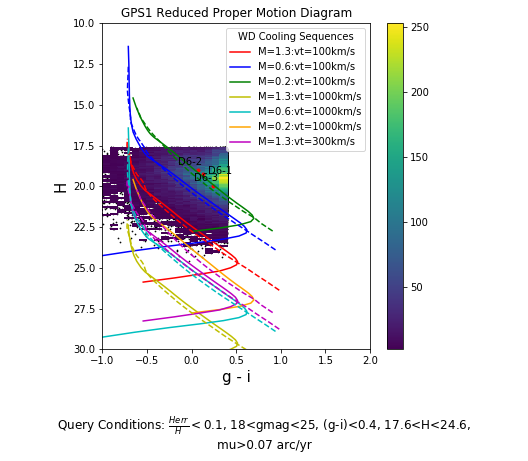

In [138]:
## Query Made for table (23)
# SELECT TOP 250000 obj_id, ra, dec, e_ra, e_dec, pmra, e_pmra, pmde, e_pmde, magg, magr, e_magg, magi, e_magi
# FROM gps1.main
# WHERE magg BETWEEN 18 and 25 
# AND (magg-magi)<0.4 
# AND (SQRT(POWER(pmra*3600,2)+POWER(pmde*3600,2)))>0.07
# AND ((POWER(5/LOG(10),2)*(POWER(pmra*3600,2)*POWER(e_pmra*3600,2)+POWER(pmde*3600,2)*POWER(e_pmde*3600,2))/((POWER(pmra*3600,4)+POWER(pmra*3600,2)*POWER(pmde*3600,2)*2 + POWER(pmde*3600,4))+POWER(e_magg,2)))/POWER(5+5*LOG10(SQRT(POWER(pmra*3600,2)+POWER(pmde*3600,2)))+magg,2))<.01 
# AND (5+5*LOG10(SQRT(POWER(pmra*3600,2)+POWER(pmde*3600,2)))+magg) BETWEEN 17.6 and 24.6

df1 = pd.read_csv('table (23).csv') #most recent table 
df2 = rpm_diagram(df1, r'Query Conditions: $\frac{Herr}{H}<0.1$, 18<gmag<25, (g-i)<0.4, 17.6<H<24.6, mu>0.07 arc/yr', 'PM_Diagram_Updated.png')

Let's try this: creating color - color diagrams (i.e., u-g vs. g-r; g-r vs. r-i) for all the stars that are redder than g-i = -1 and that are below the red line (i.e., below the 1.3 Msol, 100 km/s line).  These should ideally only be WDs that are either faster than 100 km/s or are really old and have started becoming blue again.  Hopefully the color - color diagrams will allow us to differentiate between the two.  You can lay down the theoretical tracks (hydrogen and helium) as well.

In [123]:
H13_filtered = H13.query("rpm_100 < 23 & rpm_100 > 17.5 ")
He13_filtered = He13.query("rpm_100 < 23 & rpm_100 > 17.5 ")

In [124]:
def WD_fit_func(x,a, b, c, d):
    y = a * x**3 + b*x**2 + c*x +d
    return y

1-param =  18.4362 +/- 2.5941
2-param =  11.695 +/- 2.636
3-param =  5.2031 +/- 0.6712
4-param =  22.2908 +/- 0.0788


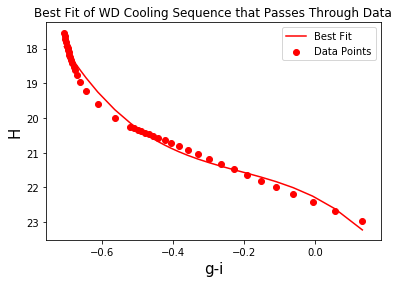

In [136]:
# For Hydrogen
popt, pcov = curve_fit(WD_fit_func, H13_filtered["g-i"], H13_filtered["rpm_100"])
perr = np.sqrt(np.diag(pcov)) #parameter uncertainty
for i in range(len(popt)):
    print(str(i+1)+'-param = ', round(popt[i],4), '+/-', round(perr[i],4))

# For Helium
popthe, pcovhe = curve_fit(WD_fit_func, He13_filtered["g-i"], He13_filtered["rpm_100"])

f = WD_fit_func(H13_filtered["g-i"],*popt)
fe = WD_fit_func(He13_filtered["g-i"],*popt)
plt.scatter(H13_filtered["g-i"], H13_filtered["rpm_100"],c='r',label='Data Points')
plt.plot(H13_filtered["g-i"],f,c='r',label='Best Fit')
plt.gca().invert_yaxis()
plt.title('Best Fit of WD Cooling Sequence that Passes Through Data')
plt.ylabel('H', size=15)
plt.xlabel('g-i',size=15)
plt.legend()
plt.show()

In [126]:
df1["f for rpm_300"] = WD_fit_func(df1["g-i"],*popt)
df1_filtered = df1[df1["reduced proper motion"] > df1["f for rpm_300"]]

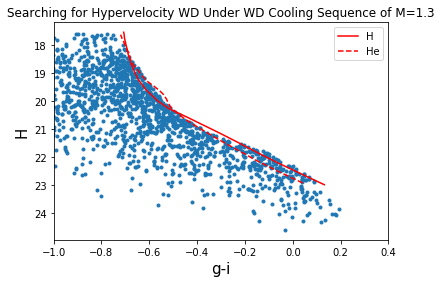

In [133]:
plt.plot(df1_filtered["g-i"],df1_filtered["reduced proper motion"],'.')
plt.plot(H13_filtered["g-i"],H13_filtered["rpm_100"],label='H',c='r')
plt.plot(He13_filtered["g-i"],He13_filtered["rpm_100"],linestyle='--',label='He',c='r')
plt.gca().invert_yaxis()
plt.title('Searching for Hypervelocity WD Under WD Cooling Sequence of M=1.3')
plt.ylabel('H',size=15)
plt.xlabel('g-i',size=15)
plt.xlim(-1,0.4)
plt.legend()